# Module 3- Regression & Beta Calculation



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sml # contains OLS model (gives more info in output)
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 3.1 
Import the file 'gold.csv', which is contains the data about last 2 years price action of Indian(MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'.

One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial fucntion of the same inputs. Also, one of the 2 columns is partially filled.

>Using linear regression, find the coefficients of the inputs and using the same trained model, complete the
      entire column.
      
>Also, try to fit the other column as well using a new linear regression model. Check if the predicitons are 
      accurate.
      Mention which column is a linear function and which is a polynomial function.
      (Hint: Plotting a histogram & distplot helps in recognizing the  discrepencies in prediction, if any.)

In [2]:
gold = pd.read_csv('GOLD.csv')
gold.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [3]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 9 columns):
Date        512 non-null object
Price       512 non-null int64
Open        512 non-null int64
High        512 non-null int64
Low         512 non-null int64
Vol.        512 non-null object
Change %    512 non-null object
Pred        411 non-null float64
new         512 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 36.1+ KB


Pred column has some unfilled values.

In [4]:
gold_to_predict = gold[gold['Pred'].isnull()] 

In [5]:
gold_df = gold[gold['Pred'].notnull()]

In [6]:
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression

/opt/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
X = gold_df.drop(['Pred', 'new', 'Date', 'Vol.', 'Change %'], axis = True)
Y = gold_df['Pred']

In [8]:
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size = 0.1)

In [9]:
clf = LinearRegression()
clf.fit(X_train, Y_train)
#accuracy = clf.score(X_test, Y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
clf.coef_ # These are coefficients of our linear model

array([ 2.,  3., -1., -4.])

In [11]:
predictions = clf.predict(X_test)

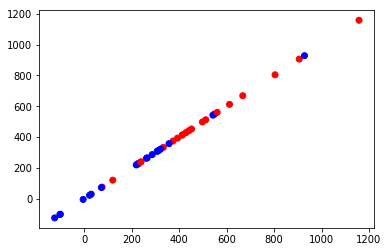

In [12]:
plt.scatter(predictions, Y_test, c=['r', 'b']) # linear

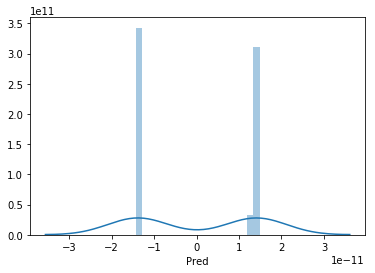

In [13]:
sns.distplot(Y_test - predictions, bins = 20) # checking accuracy of predictions using a residual histogram

In [14]:
gold_to_predict['Pred'] = clf.predict(gold_to_predict.drop(['Pred', 'new', 'Date', 'Vol.', 'Change %'], axis = True))

In [15]:
gold_new = pd.concat([gold_df, gold_to_predict])

In [16]:
gold_new.head(20)

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
5,"May 11, 2017",28022,27995,28100,27945,9.72K,0.05%,149.0,182.427089
6,"May 12, 2017",28019,28088,28195,27985,9.48K,-0.01%,167.0,141.255137
7,"May 15, 2017",28008,28049,28157,27996,8.76K,-0.04%,22.0,120.069010
8,"May 16, 2017",28109,28025,28159,28025,7.73K,0.36%,34.0,218.401641
9,"May 17, 2017",28614,28170,28638,28170,15.92K,1.80%,420.0,919.376358


In [17]:
gold_new.index = pd.DatetimeIndex(pd.to_datetime(gold.Date))

In [18]:
gold =  gold_new.drop('Date', axis = True)

In [19]:
gold.head(4)

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
2017-05-04,28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
2017-05-05,28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2017-05-08,28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
2017-05-09,27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064


#### CAPM CAPM Analysis and Beta Calculation using regression - 

CAPM(Capital Asset Pricing Model) attempts to price securities by examining the relationship that exists between expected returns and risk. 

The Beta of an asset is a measure of the sensitivity of its returns relative to a market benchmark (usually a market index). How sensitive/insensitive is the returns of an asset to the overall market returns (usually a market index like S&P 500 index). What happens when the market jumps, does the returns of the asset jump accordingly or jump somehow? 

### Query 3.2
Import the stock of your choosing AND the Nifty index. 
Using linear regression (OLS), calculate -

###### The daily Beta value for the past 3 months. (Daily= Daily returns)

###### The monthly Beta value. (Monthly= Monthly returns)

Refrain from using the (covariance(x,y)/variance(x)) formula. 

Attempt the question using regression.

Were the Beta values more or less than 1 ? What if it was negative ? 
Discuss. Include a brief writeup in the bottom of your jupyter notebook with your inferences from the Beta values and regression results


In [20]:
voltas = pd.read_csv('VOLTAS.csv')
voltas = voltas[voltas['Series'] == 'EQ']
voltas.index = pd.DatetimeIndex(pd.to_datetime(voltas.Date))

nifty = pd.read_csv('Nifty50.csv')
nifty.index = pd.DatetimeIndex(pd.to_datetime(nifty.Date))

In [21]:
voltas.head(4)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,,
2017-05-15,VOLTAS,EQ,15-May-2017,433.55,436.0,436.4,430.10,433.40,431.85,432.15,696583,3.010253e+08,14160,327583,47.03
2017-05-16,VOLTAS,EQ,16-May-2017,431.85,432.0,438.2,430.70,433.00,432.45,433.46,996780,4.320614e+08,19456,366664,36.78
2017-05-17,VOLTAS,EQ,17-May-2017,432.45,435.0,435.0,427.25,430.85,430.20,429.93,686830,2.952867e+08,11494,307390,44.75
2017-05-18,VOLTAS,EQ,18-May-2017,430.20,425.1,427.0,412.70,414.50,414.10,418.14,1231618,5.149912e+08,18700,571822,46.43


In [22]:
nifty.head(4)

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,,
2017-05-15,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
2017-05-16,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2017-05-17,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
2017-05-18,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46


In [23]:
combined = pd.concat([voltas['Close Price'], nifty['Close']], axis = 1)
combined.columns = ['Voltas', 'NIFTY50']
combined.head(4)

,Voltas,NIFTY50
Date,,
2017-05-15,431.85,9445.40
2017-05-16,432.45,9512.25
2017-05-17,430.20,9525.75
2017-05-18,414.10,9429.45


In [24]:
returns = combined.pct_change()
returns = returns.dropna(axis = 0)
returns.head(4)

,Voltas,NIFTY50
Date,,
2017-05-16,0.001389,0.007078
2017-05-17,-0.005203,0.001419
2017-05-18,-0.037424,-0.010109
2017-05-19,0.003985,-0.000164


In [25]:
returns = returns.iloc[-63:, :] # taking it as time of three months

In [26]:
X = returns['NIFTY50']
Y = returns['Voltas']

model = sml.OLS(Y, X)
results = model.fit()

In [27]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Voltas   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     8.910
Date:                Sat, 20 Jul 2019   Prob (F-statistic):            0.00406
Time:                        03:00:59   Log-Likelihood:                 178.41
No. Observations:                  63   AIC:                            -354.8
Df Residuals:                      62   BIC:                            -352.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
NIFTY50        0.7788      0.261      2.985      0.0

Daily Beta value for last 3 months in dataset is 0.7788

In [28]:
combined['Months'] = combined.index.to_period('M')

In [29]:
combined.head(4)

,Voltas,NIFTY50,Months
Date,,,
2017-05-15,431.85,9445.40,2017-05
2017-05-16,432.45,9512.25,2017-05
2017-05-17,430.20,9525.75,2017-05
2017-05-18,414.10,9429.45,2017-05


In [30]:
month = np.zeros((25, 2), dtype = float)

In [31]:
for i, j in enumerate(combined.Months.unique()):
    
    temp = combined[combined.Months == j]
    
    month[i] = temp.iloc[-1, 0:2]

In [32]:
month = pd.DataFrame(month)

In [33]:
month.columns = ['voltas', 'nifty']

In [34]:
month.index = combined['Months'].unique()

In [35]:
month

,voltas,nifty
2017-05,486.35,9621.25
2017-06,457.25,9520.90
2017-07,504.25,10077.10
2017-08,524.75,9917.90
2017-09,506.05,9788.60
2017-10,567.60,10335.30
2017-11,636.60,10226.55
2017-12,655.90,10530.70
2018-01,605.00,11027.70
2018-02,609.40,10492.85


In [36]:
month = month.pct_change()
month = month.dropna(axis = 0)

X = month['nifty']
Xc = sml.add_constant(X)
Y = month['voltas']

model = sml.OLS(Y, Xc)
results = model.fit()

In [37]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 voltas   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     7.493
Date:                Sat, 20 Jul 2019   Prob (F-statistic):             0.0120
Time:                        03:01:00   Log-Likelihood:                 31.935
No. Observations:                  24   AIC:                            -59.87
Df Residuals:                      22   BIC:                            -57.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0031      0.014      0.224      0.8

Monthly Beta value is 0.7702, similar to the daily beta value.

### Discussion

'Pred' column is linearly dependent on COHL prices with coefficients 2, 3, -1, -4 respectively.

Daily Beta value for last  three months - 0.7788

Monthly Beta value                      - 0.7702

Beta value is positive and less than 1.0 in both cases.

This shows that the Voltas is theoritically less volatile than the NIFTY index and hence the market. Hence, including it in portfolio makes it less risky than without it.


**What if Beta value is negative ?**

A negative beta value means that the stock moves in opposite direction than market. If market falls, stock will rise and vice versa.